<a href="https://colab.research.google.com/github/s1234khan/Induction-Motor-anomalies/blob/main/Induction_Motor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np

##EDA Analysis of given data set

In [14]:
df112 = pd.read_excel('/content/induction motor.xlsx', sheet_name='data112')
print(df112)

      current
0         120
1           0
2           0
3         120
4           0
...       ...
9995        0
9996      248
9997        0
9998        0
9999        0

[10000 rows x 1 columns]


In [15]:
df112.describe()

,current
count,10000.000000
mean,14.992000
std,49.176191
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,248.000000


In [16]:
df109 = pd.read_excel('/content/induction motor.xlsx', sheet_name='data109')
print(df109)

      current
0           0
1           0
2           0
3           0
4         128
...       ...
9995        0
9996        0
9997        0
9998        0
9999        0

[10000 rows x 1 columns]


In [17]:
df109.describe()


,current
count,10000.000000
mean,17.273600
std,54.134431
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,248.000000


In [18]:
df89 = pd.read_excel('/content/induction motor.xlsx', sheet_name='data89')
print(df89)

      current
0           0
1           0
2           0
3           0
4           0
...       ...
9995        0
9996        0
9997      120
9998        0
9999        0

[10000 rows x 1 columns]


In [19]:
df89.describe()

,current
count,10000.000000
mean,14.120000
std,46.917947
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,248.000000


In [20]:
df88 = pd.read_excel('/content/induction motor.xlsx', sheet_name='data88')
print(df88)

      current
0           0
1           0
2           0
3           0
4           0
...       ...
9995        0
9996        0
9997        0
9998        0
9999        0

[10000 rows x 1 columns]


In [21]:
df88.describe()


,current
count,10000.000000
mean,15.171200
std,49.182661
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,248.000000


In [22]:
df0 = pd.read_excel('/content/induction motor.xlsx', sheet_name='data0 (1)')
print(df0)

      current
0           0
1           0
2           0
3           0
4           0
...       ...
9995      248
9996      248
9997      128
9998        0
9999        0

[10000 rows x 1 columns]


In [23]:
df0.describe()

,current
count,10000.000000
mean,59.864800
std,82.320701
min,0.000000
25%,0.000000
50%,0.000000
75%,120.000000
max,248.000000


In [24]:
df9 = pd.read_excel('/content/induction motor.xlsx', sheet_name='data9')
print(df9)

      current
0           0
1         128
2         248
3           0
4           0
...       ...
9995        0
9996      248
9997      128
9998        0
9999      248

[10000 rows x 1 columns]


In [25]:
df9.describe()

,current
count,10000.000000
mean,64.128800
std,86.357357
min,0.000000
25%,0.000000
50%,0.000000
75%,120.000000
max,248.000000


In [26]:
curr_info = [['d9',64.1288,86.357357,0.000000,120.000000],['d0',59.8648,82.320701,0.000000,120.000000],
             ['d88',15.171200,49.182661,0.000000,0.000000],['d89',14.120000,46.917947,0.000000,0.000000],
             ['d109',17.273600,54.134431,0.000000,0.000000],['d112',64.128800,86.357357,0.000000,120.000000]]

In [27]:
df_info = pd.DataFrame(curr_info,
                  columns=['dataID', 'Mean', 'Std', '50%', '75%'])

In [28]:
df_info

,dataID,Mean,Std,50%,75%
0,d9,64.1288,86.357357,0.0,120.0
1,d0,59.8648,82.320701,0.0,120.0
2,d88,15.1712,49.182661,0.0,0.0
3,d89,14.1200,46.917947,0.0,0.0
4,d109,17.2736,54.134431,0.0,0.0
5,d112,64.1288,86.357357,0.0,120.0


R^2 score: 1.0
Mean squared error: 3.129536065604945e-24


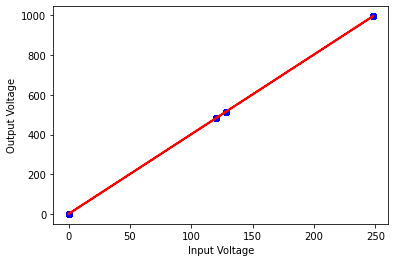

In [29]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generate some sample data
#np.random.seed(0)
x = df9
y = 2 + 3 * x + df9

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Print the R^2 score of the model
r2 = r2_score(y_test, y_pred)
print("R^2 score:", r2)

# Print the mean squared error of the model
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

# Plot the predicted values against the actual values
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.xlabel("Input Voltage")
plt.ylabel("Output Voltage")
plt.show()

#First Approach

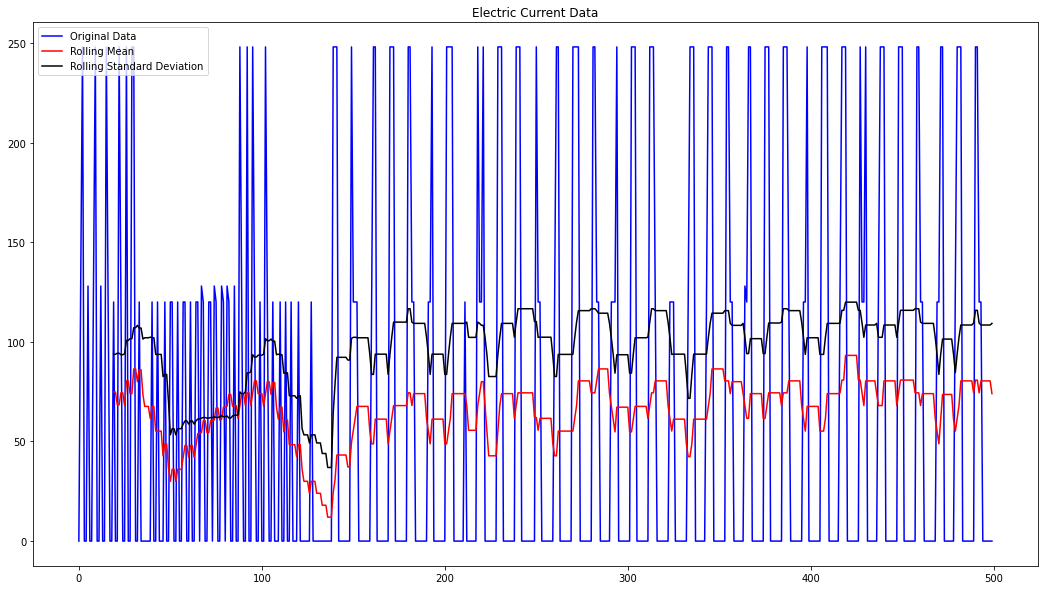

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Load electric current data
data = df9.head(500)

# Calculate rolling average and standard deviation
rolling_mean = data.rolling(window=20).mean()
rolling_std = data.rolling(window=20).std()

# Plot original data and rolling statistics
plt.figure(figsize=(18,10))
plt.plot(data, color='blue', label='Original Data')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Standard Deviation')
plt.legend(loc='best')
plt.title('Electric Current Data')
plt.show()


In [31]:
# Set threshold for detecting anomalies
threshold = 3

# Identify anomalous data points
anomalies = []
for i in range(len(data)):
  #print(data['current'][i])
  #print(rolling_mean['current'][i])
  #print(rolling_std['current'][i])
  z_score = (data['current'][i] - rolling_mean['current'][i]) / rolling_std['current'][i]
  #print(z_score)
  if np.abs(z_score) > threshold:
    anomalies.append(i)


In [32]:
# Print anomalous data points
print("Anomalous data points:", anomalies)

Anomalous data points: [139]


#Second Approach to detect Anomalies

In [33]:
import numpy as np
from sklearn.ensemble import IsolationForest

# Load electric current data
data1 = df112

# Create isolation forest model
model = IsolationForest(n_estimators=100, contamination=0.1)

# Fit model to data
model.fit(data1)

# Predict anomalies
anomalies = model.predict(data1)

# Loop through predicted anomalies and print index of anomaly
for i, anomaly in enumerate(anomalies):
    if anomaly == -1:
      print("Anomaly detected at index:", i)






/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Anomaly detected at index: 0
Anomaly detected at index: 3
Anomaly detected at index: 7
Anomaly detected at index: 10
Anomaly detected at index: 13
Anomaly detected at index: 14
Anomaly detected at index: 17
Anomaly detected at index: 20
Anomaly detected at index: 24
Anomaly detected at index: 27
Anomaly detected at index: 31
Anomaly detected at index: 34
Anomaly detected at index: 35
Anomaly detected at index: 38
Anomaly detected at index: 42
Anomaly detected at index: 56
Anomaly detected at index: 57
Anomaly detected at index: 108
Anomaly detected at index: 109
Anomaly detected at index: 117
Anomaly detected at index: 118
Anomaly detected at index: 119
Anomaly detected at index: 127
Anomaly detected at index: 138
Anomaly detected at index: 139
Anomaly detected at index: 140
Anomaly detected at index: 148
Anomaly detected at index: 149
Anomaly detected at index: 150
Anomaly detected at index: 151
Anomaly detected at index: 159
Anomaly detected at index: 170
Anomaly detected at index: 1

#Third Approach


In [34]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
from sklearn.ensemble import IsolationForest


In [38]:
df112

,current
0,120
1,0
2,0
3,120
4,0
...,...
9995,0
9996,248
9997,0
9998,0


In [41]:
model_1 = IsolationForest(n_estimators=125,max_samples='auto',contamination=float(0.2),max_features=1.0)
model_1.fit(df112[['current']])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.2, n_estimators=125)

In [42]:
df112['anomalies_score']=model_1.decision_function(df112[['current']])
df112['anomaly']=model_1.predict(df112[['current']])
df112.head(20)

,current,anomalies_score,anomaly
0,120,-0.210487,-1
1,0,0.000000,1
2,0,0.000000,1
3,120,-0.210487,-1
4,0,0.000000,1
5,0,0.000000,1
6,0,0.000000,1
7,120,-0.210487,-1
8,0,0.000000,1
9,0,0.000000,1
